# Titanic survival prediction model
#### by  Apoorva Tiwari 

## Data Cleansing

In [2]:
import pandas as pd
df=pd.read_csv("train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.drop(['PassengerId'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import numpy as np
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [10]:
df['Cabin'].replace(to_replace=np.nan,value='Info unavailable',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Info unavailable,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Info unavailable,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Info unavailable,S


In [11]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
#Since only 3 values are missing, the most common values are filled in place of null values
df['Embarked']=df['Embarked'].fillna('S')

## Exploratory Data Analysis and Feature Engineering

In [13]:
testdf=pd.read_csv('test.csv')

In [14]:
testdf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
print(testdf.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
#Since the age and cabin columns have many null values, they are replaced with suitable data 
testdf['Age'].fillna(testdf['Age'].mean(),inplace=True)
testdf['Cabin'].replace(to_replace=np.nan,value='Info unavailable',inplace=True)
testdf['Embarked']=testdf['Embarked'].fillna('S')

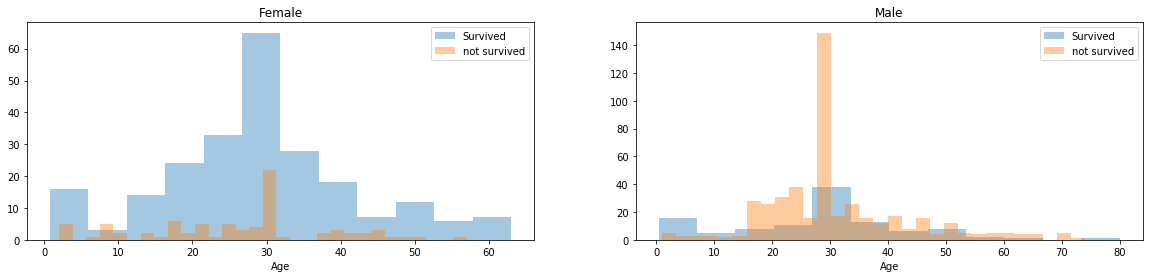

In [20]:
#Sex vs Survived
import matplotlib.pyplot as plt
import seaborn as sns
survived='Survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1, ncols=2 , figsize=(20,4))
female=df[df['Sex']=='female']
male=df[df['Sex']=='male']
ax=sns.distplot(female[female[survived]==1].Age.dropna(),bins=12,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(female[female[survived]==0].Age.dropna(),bins=30,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(male[male[survived]==1].Age.dropna(),bins=12,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(male[male[survived]==0].Age.dropna(),bins=30,label=not_survived,ax=axes[1],kde=False)
ax.legend()
_=ax.set_title('Male')

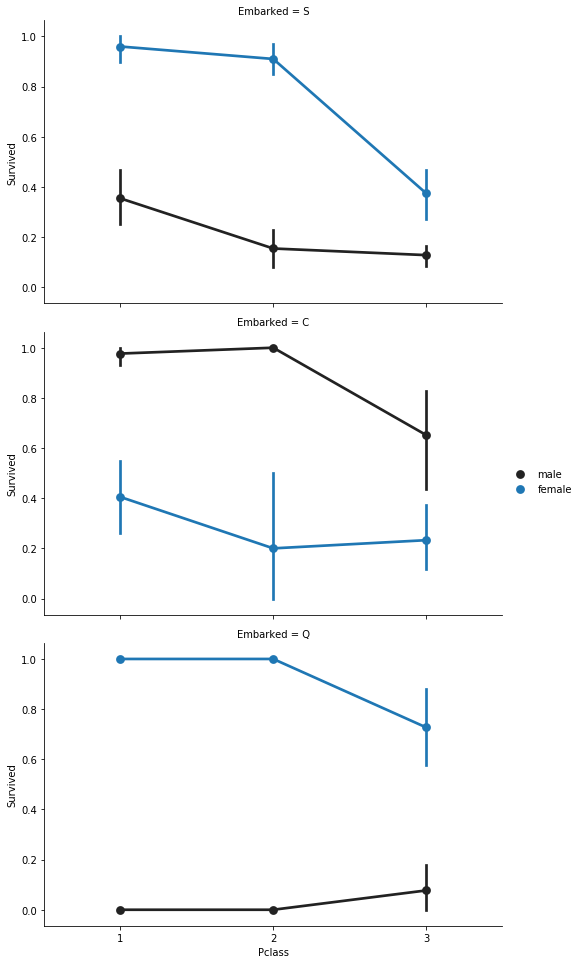

In [25]:
#Embarked vs Pclass vs Sex
FacetGrid=sns.FacetGrid(df,row='Embarked',height=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

In [27]:
df.Survived.value_counts()/len(df)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [28]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


Text(0.5, 1, 'Correlations among different features of the dataset')

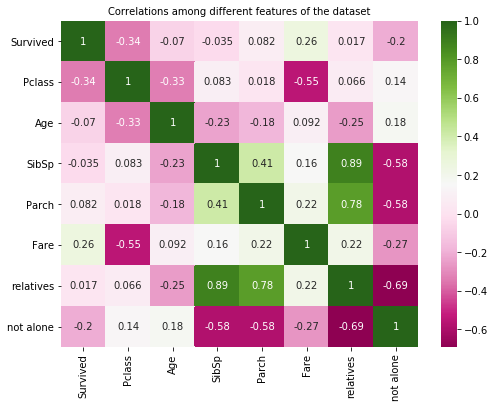

In [33]:
plt.subplots(figsize =(8,6))
sns.heatmap(df.corr(),annot=True,cmap="PiYG")
plt.title("Correlations among different features of the dataset",fontsize=10)

#It is observed that

In [36]:
#SibSp and Parch
data=[df,testdf]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

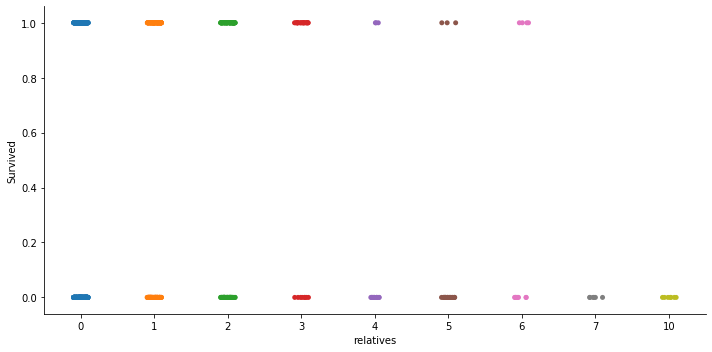

In [44]:
axes=sns.catplot('relatives','Survived',data=df,aspect=2)

([<matplotlib.axis.XTick at 0x1692f70d488>,
 <a list of 3 Text xticklabel objects>)

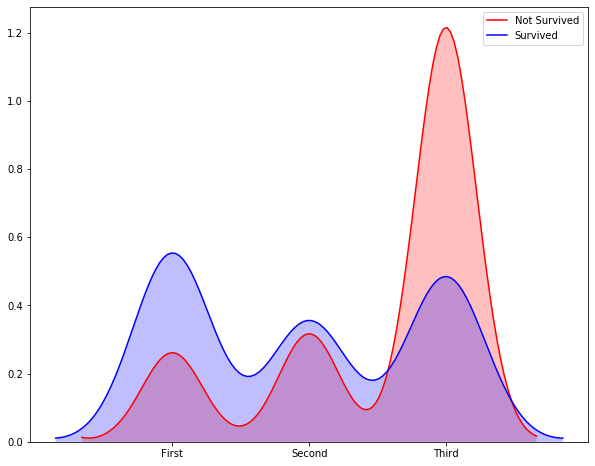

In [47]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived']==0),'Pclass'],shade=True,color='r',label='Not Survived')
a=sns.kdeplot(df.loc[(df['Survived']==1),'Pclass'],shade=True,color='b',label='Survived')
labels=['First','Second','Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

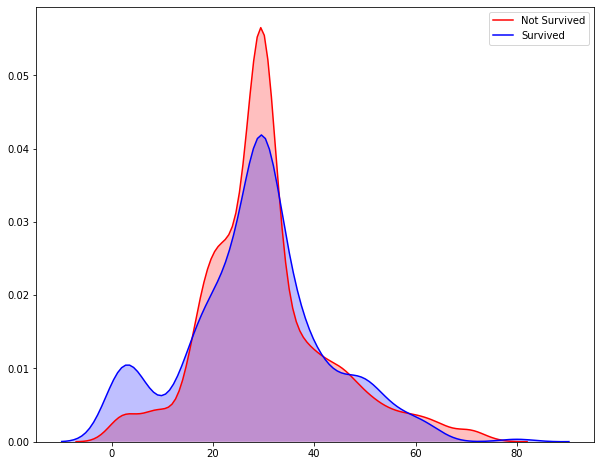

In [48]:
fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived']==0),'Age'],shade=True,color='r',label='Not Survived')
sns.kdeplot(df.loc[(df['Survived']==1),'Age'],shade=True,color='b',label='Survived')


In [61]:
data=[df,testdf]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [62]:
genders={'male':0,'female':1}
data=[df,testdf]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [63]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [64]:
data=[df,testdf]
for dataset in data:
    dataset=dataset.drop(['Ticket'],axis=1)

In [65]:
port={'S':0,'C':1,'Q':2}
data=[df,testdf]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(port)

In [66]:
data=[df,testdf]
for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11)&(dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18)&(dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22)&(dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27)&(dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33)&(dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=66),'Age']=6
    dataset.loc[(dataset['Age']>66),'Age']=7

In [94]:
data=[df,testdf]
for dataset in data:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[(dataset['Fare']>31)&(dataset['Fare']<=99),'Fare']=3
    dataset.loc[(dataset['Fare']>99)&(dataset['Fare']<=250),'Fare']=4
    dataset.loc[(dataset['Fare']>250),'Fare']=5
    dataset['Cabin'].replace(to_replace='Info unavailable',value=0,inplace=True)

# Model Phase

In [95]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [96]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'relatives', 'not alone', 'not_alone'],
      dtype='object')

In [97]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not alone,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0,0,1,0.0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,0,C85,1,1,0.0,0
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,0,0,0,1.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,0,C123,0,1,0.0,0
4,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,0,0,0,0,1.0,1


In [98]:
df.Fare.describe()

count    891.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fare, dtype: float64

In [103]:
independent_var=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives', 'not_alone',]
data=df[independent_var]
label=df.Fare
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone
0,0,3,0,2,1,0,0,1,0
1,1,1,1,5,1,0,0,1,0
2,1,3,1,3,0,0,0,0,1
3,1,1,1,5,1,0,0,1,0
4,0,3,0,5,0,0,0,0,1


In [110]:
x=data.drop('Survived',axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

## Logistic Regression

In [111]:
regressor=LogisticRegression()

In [112]:
regressor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
predictions = regressor.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
acc_Logistic_Regression= round(regressor.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.87      0.55      0.67       154
           1       0.59      0.89      0.71       114

    accuracy                           0.69       268
   macro avg       0.73      0.72      0.69       268
weighted avg       0.75      0.69      0.69       268



## SVM

In [140]:
from sklearn.svm import SVC,LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
print(classification_report(y_test, y_pred))
acc_SVM= round(linear_svc.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       154
           1       0.81      0.65      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



C:\Users\AT\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(n_estimators=100)
rand_forest.fit(x_train,y_train)
y_predict=rand_forest.predict(x_test)
print(classification_report(y_test, y_predict))
acc_random_forest= round(rand_forest.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.83      0.68      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268



## KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)
print(classification_report(y_test, y_prediction))
acc_KNN= round(knn.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



## Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
print(classification_report(y_test, y_pred))
acc_gaussian= round(gaussian.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.68      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



## Perceptron

In [157]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron(max_iter=10)
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
print(classification_report(y_test, y_pred))
acc_perceptron= round(perceptron.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       154
           1       0.83      0.48      0.61       114

    accuracy                           0.74       268
   macro avg       0.77      0.71      0.71       268
weighted avg       0.76      0.74      0.72       268



## Stochastic Gradient Decent

In [158]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(max_iter=5,tol=None)
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
print(classification_report(y_test, y_pred))
acc_SGD= round(SGD.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       154
           1       0.62      0.74      0.67       114

    accuracy                           0.69       268
   macro avg       0.70      0.70      0.69       268
weighted avg       0.71      0.69      0.70       268



## Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred=decision.predict(x_test)
print(classification_report(y_test, y_pred))
acc_decision_tree= round(decision.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       154
           1       0.81      0.61      0.70       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [162]:
results=pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron',
             'Stochastic Gradient Decent','Decision Tree'],
    'Score':[acc_SVM,acc_KNN,acc_Logistic_Regression,acc_random_forest,acc_gaussian,acc_perceptron,
             acc_SGD,acc_decision_tree]
})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
86.84,Random Forest
86.84,Decision Tree
84.75,KNN
80.74,Support Vector Machines
80.26,Naive Bayes
76.73,Perceptron
70.63,Stochastic Gradient Decent
64.69,Logistic Regression


#### Therefore best model for this dataset = Random Forest 

### Hyperparameter Tuning

In [173]:
param_grid= {"criterion":['gini','entropy'],'min_samples_leaf':[1,5,10],'min_samples_split':[2,4,10,12],
             'n_estimators':[100,400]}
param_grid

{'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 5, 10],
 'min_samples_split': [2, 4, 10, 12],
 'n_estimators': [100, 400]}

In [174]:
from sklearn.model_selection import GridSearchCV , cross_val_score
rf=RandomForestClassifier(n_estimators=100 ,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)

In [176]:
classification=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)

In [179]:
classification.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=1,
                                   

In [180]:
classification.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [182]:
random_forest=RandomForestClassifier(criterion='entropy',min_samples_leaf=10,min_samples_split=2,n_estimators=100,
                                    max_features='auto',oob_score=True,random_state=1,n_jobs=-1)

In [183]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [184]:
random_forest.score(x_train,y_train)

0.8298555377207063

In [185]:
print('oob score:',round(random_forest.oob_score_,4)*100,'%')

oob score: 82.34 %


## Model Evaluation

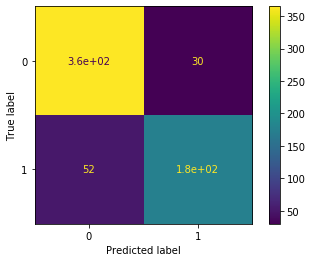

In [188]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rand_forest,x_train,y_train)

In [192]:
y_predict=random_forest.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       154
           1       0.84      0.67      0.75       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



In [193]:
from sklearn.metrics import precision_recall_curve

In [195]:
y_scores=random_forest.predict_proba(x_train)
y_scores=y_scores[:,1]

In [196]:
precision,recall,threshold=precision_recall_curve(y_train,y_scores)


In [197]:
def plot_precision_recall(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],'r-',label='Precision',linewidth=5)
    plt.plot(threshold,recall[:-1],'b',label='Recall',linewidth=5)
    plt.xlabel('threshold',fontsize=20)
    plt.legend()
    plt.ylim([0,1])
    

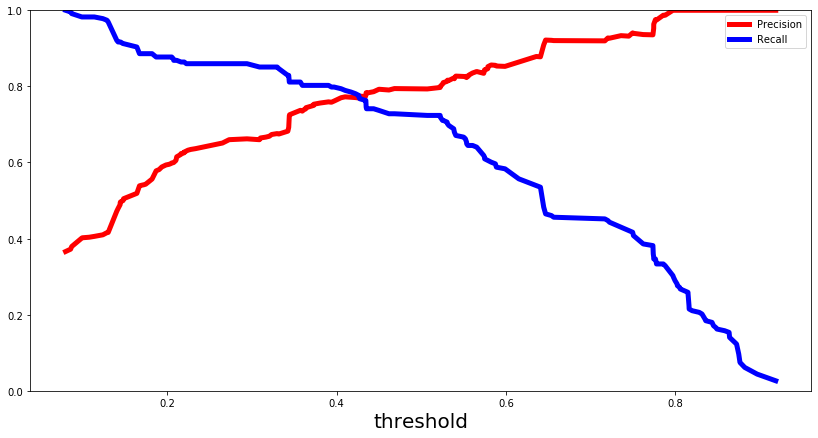

In [198]:
plt.figure(figsize=(14,7))
plot_precision_recall(precision,recall,threshold)

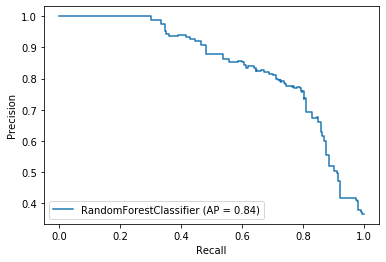

In [199]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(random_forest,x_train,y_train)

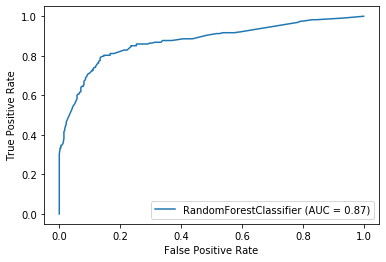

In [200]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_forest,x_train,y_train)